# Smoothify - Example Images Generator


In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from smoothify import smoothify

# Set high-quality output parameters
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["font.family"] = "sans-serif"

In [14]:
# Helper function to plot geometry with consistent styling
def plot_geometry(geom, ax, color, edge_color):
    """Plot geometry with consistent styling."""
    if hasattr(geom, "geoms"):
        for g in geom.geoms:
            plot_geometry(g, ax, color, edge_color)
    elif geom.geom_type == "LineString":
        x, y = geom.xy
        ax.plot(x, y, color=edge_color, linewidth=3, solid_capstyle="round")
    else:
        # Plot exterior
        x, y = geom.exterior.xy
        ax.fill(x, y, color=color, alpha=1, edgecolor=edge_color, linewidth=2.5)

        # Plot holes if present
        for interior in geom.interiors:
            x, y = interior.xy
            ax.fill(x, y, color="white", alpha=1.0, edgecolor=edge_color, linewidth=2.5)


def create_comparison_image(original, smoothed, title, filename, is_line=False):
    """Create a side-by-side comparison image."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Colors for input and output
    input_color = "#e74c3c" if not is_line else "#e74c3c"
    input_edge = "#c0392b" if not is_line else "#c0392b"
    output_color = "#2ecc71" if not is_line else "#2ecc71"
    output_edge = "#27ae60" if not is_line else "#27ae60"

    # Plot original
    plot_geometry(original, ax1, input_color, input_edge)
    ax1.set_aspect("equal")
    ax1.axis("off")
    ax1.set_title("Input", fontsize=20, fontweight="bold", pad=15)

    # Plot smoothed
    plot_geometry(smoothed, ax2, output_color, output_edge)
    ax2.set_aspect("equal")
    ax2.axis("off")
    ax2.set_title("Output", fontsize=20, fontweight="bold", pad=15)

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight", facecolor="white")
    plt.show()

    print(f"\n{'=' * 60}")
    print(f"Image saved as '{filename}'")
    print(f"{'=' * 60}")

## Example 1: Basic Polygon Smoothing

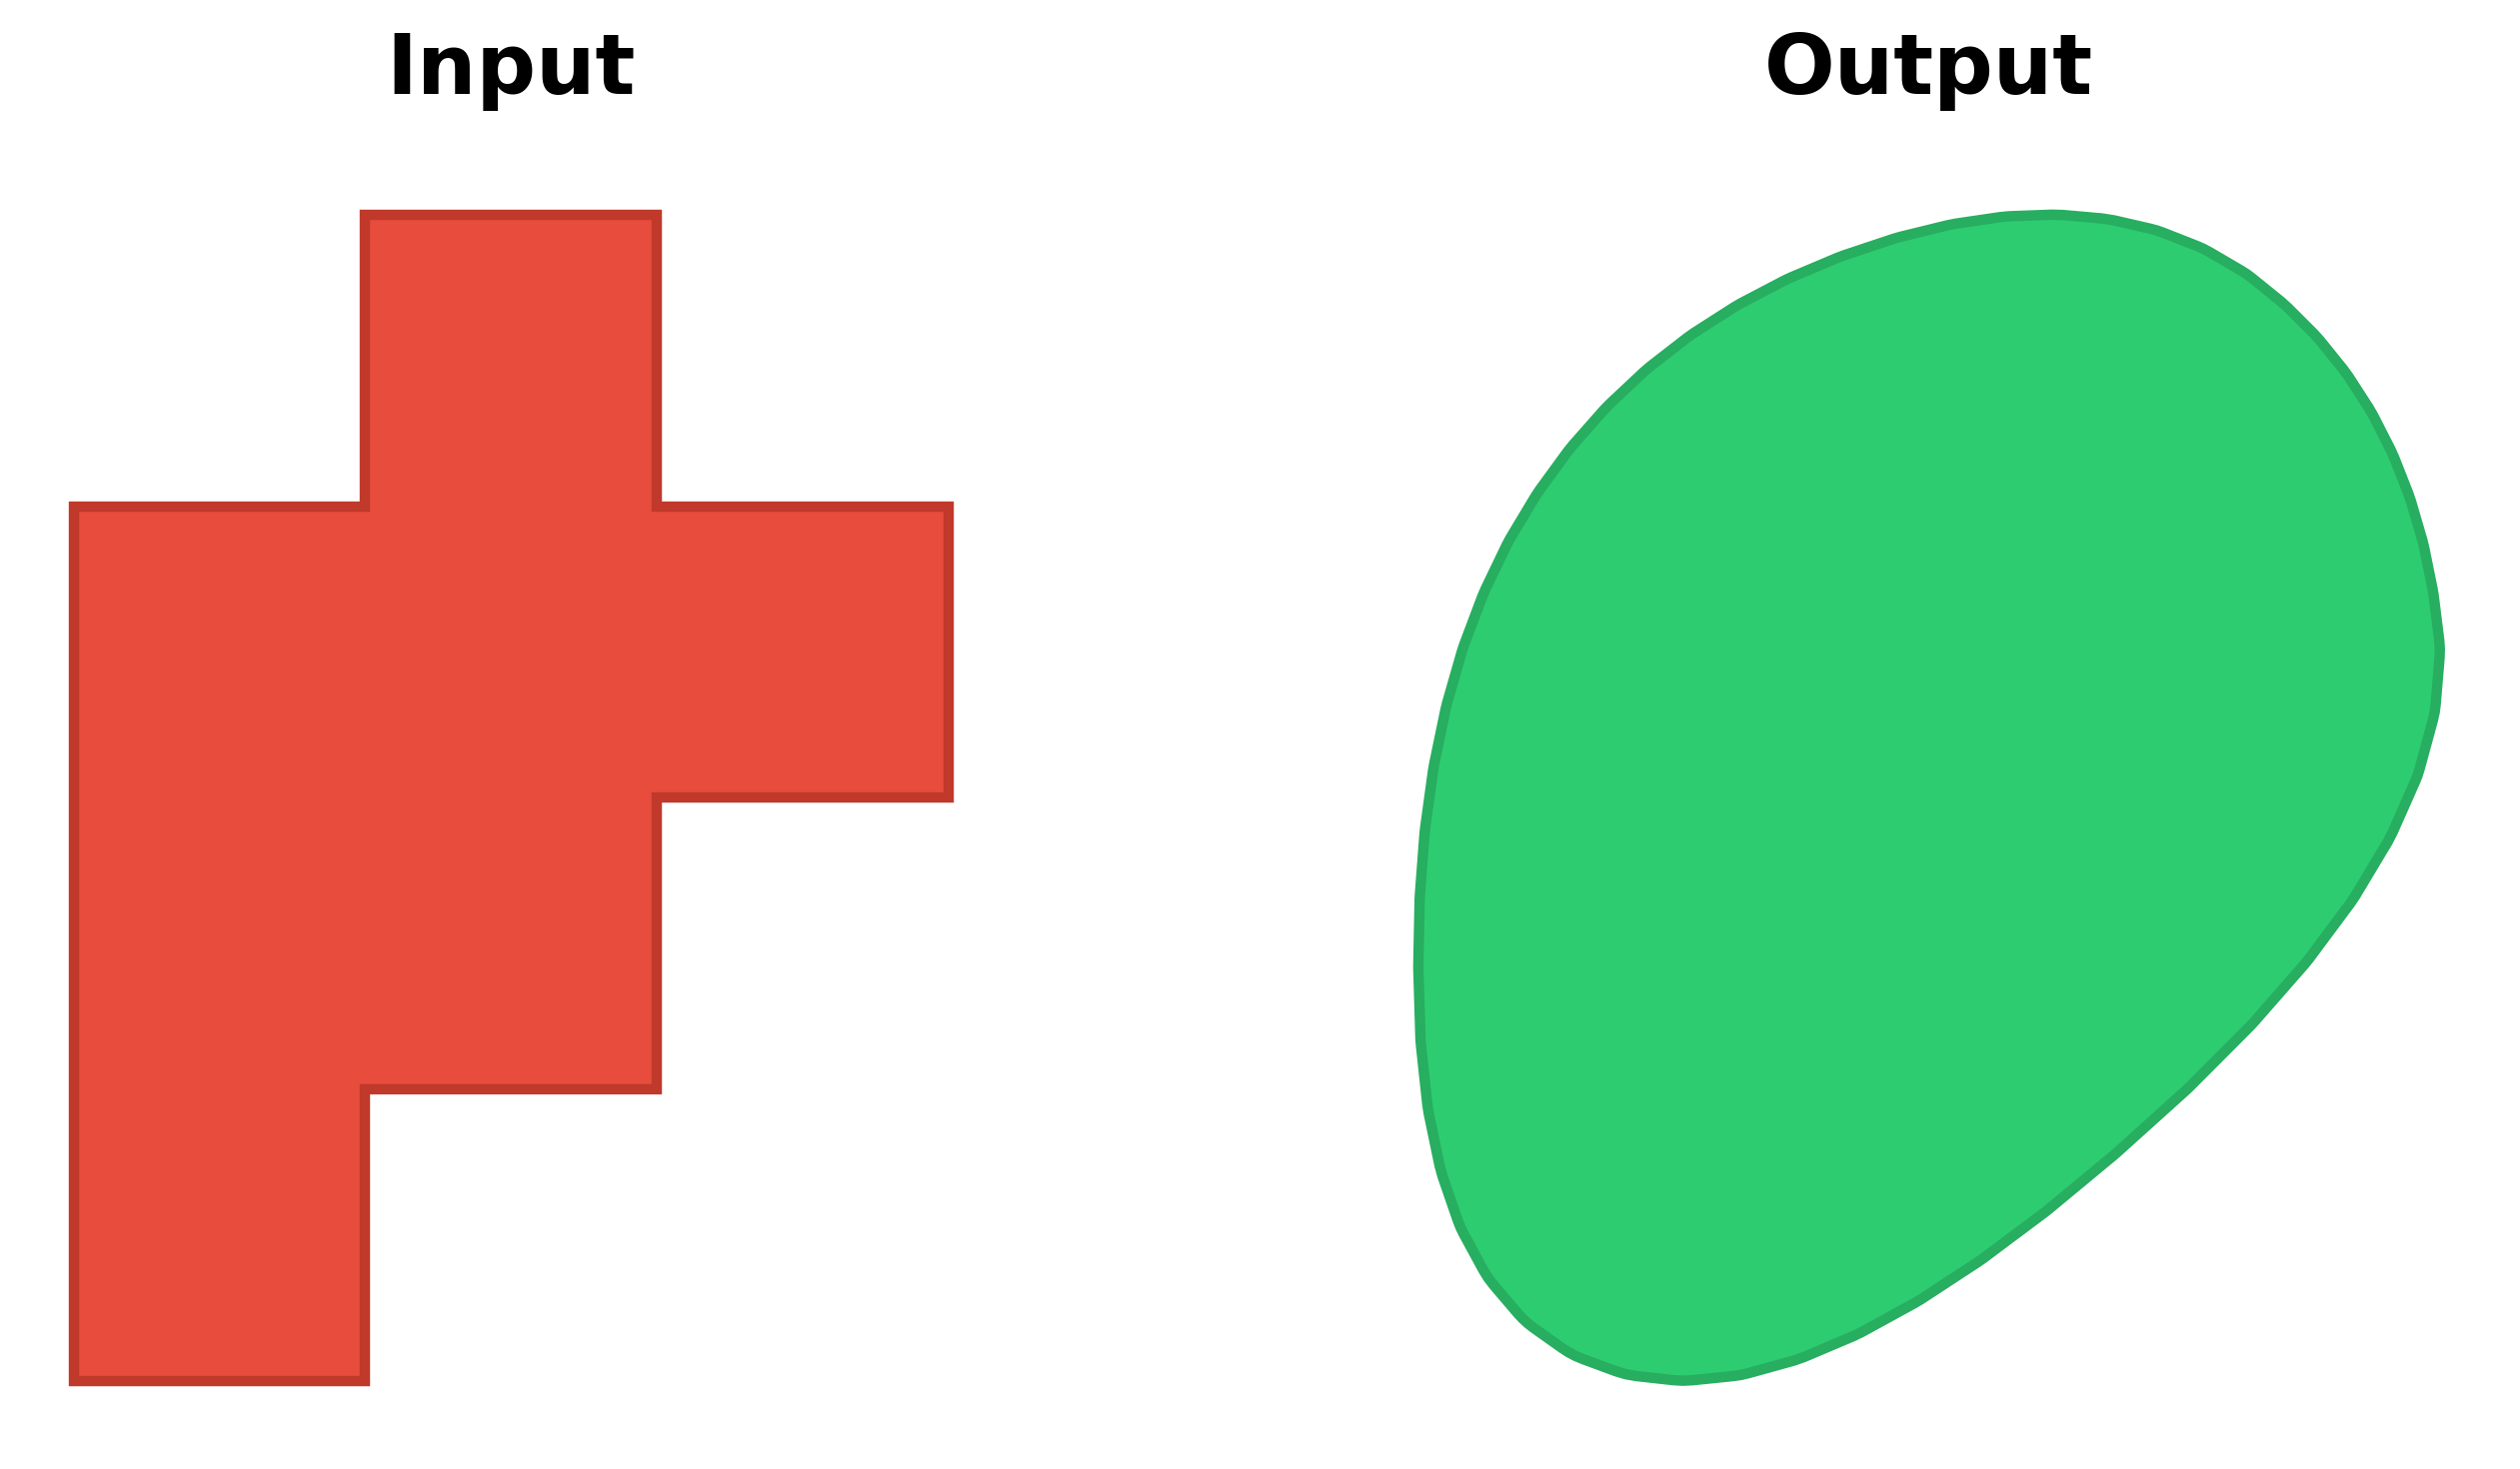


Image saved as 'example_1_polygon.png'
Original area: 700.00
Smoothed area: 700.00


In [15]:
# Create a pixelated polygon (simulating raster-derived geometry)
pixelated_polygon = Polygon(
    [
        (0, 0),
        (10, 0),
        (10, 10),
        (20, 10),
        (20, 20),
        (30, 20),
        (30, 30),
        (20, 30),
        (20, 40),
        (10, 40),
        (10, 30),
        (0, 30),
        (0, 20),
        (0, 10),
        (0, 0),
    ]
)

# Smooth the polygon
smoothed_polygon = smoothify(
    geom=pixelated_polygon,
    segment_length=10.0,
    smooth_iterations=3,
    preserve_area=True,
)

# Create comparison image
create_comparison_image(
    pixelated_polygon,
    smoothed_polygon,
    "Example 1: Basic Polygon Smoothing",
    "example_1_polygon.png",
)

print(f"Original area: {pixelated_polygon.area:.2f}")
print(f"Smoothed area: {smoothed_polygon.area:.2f}")

## Example 2: LineString Smoothing

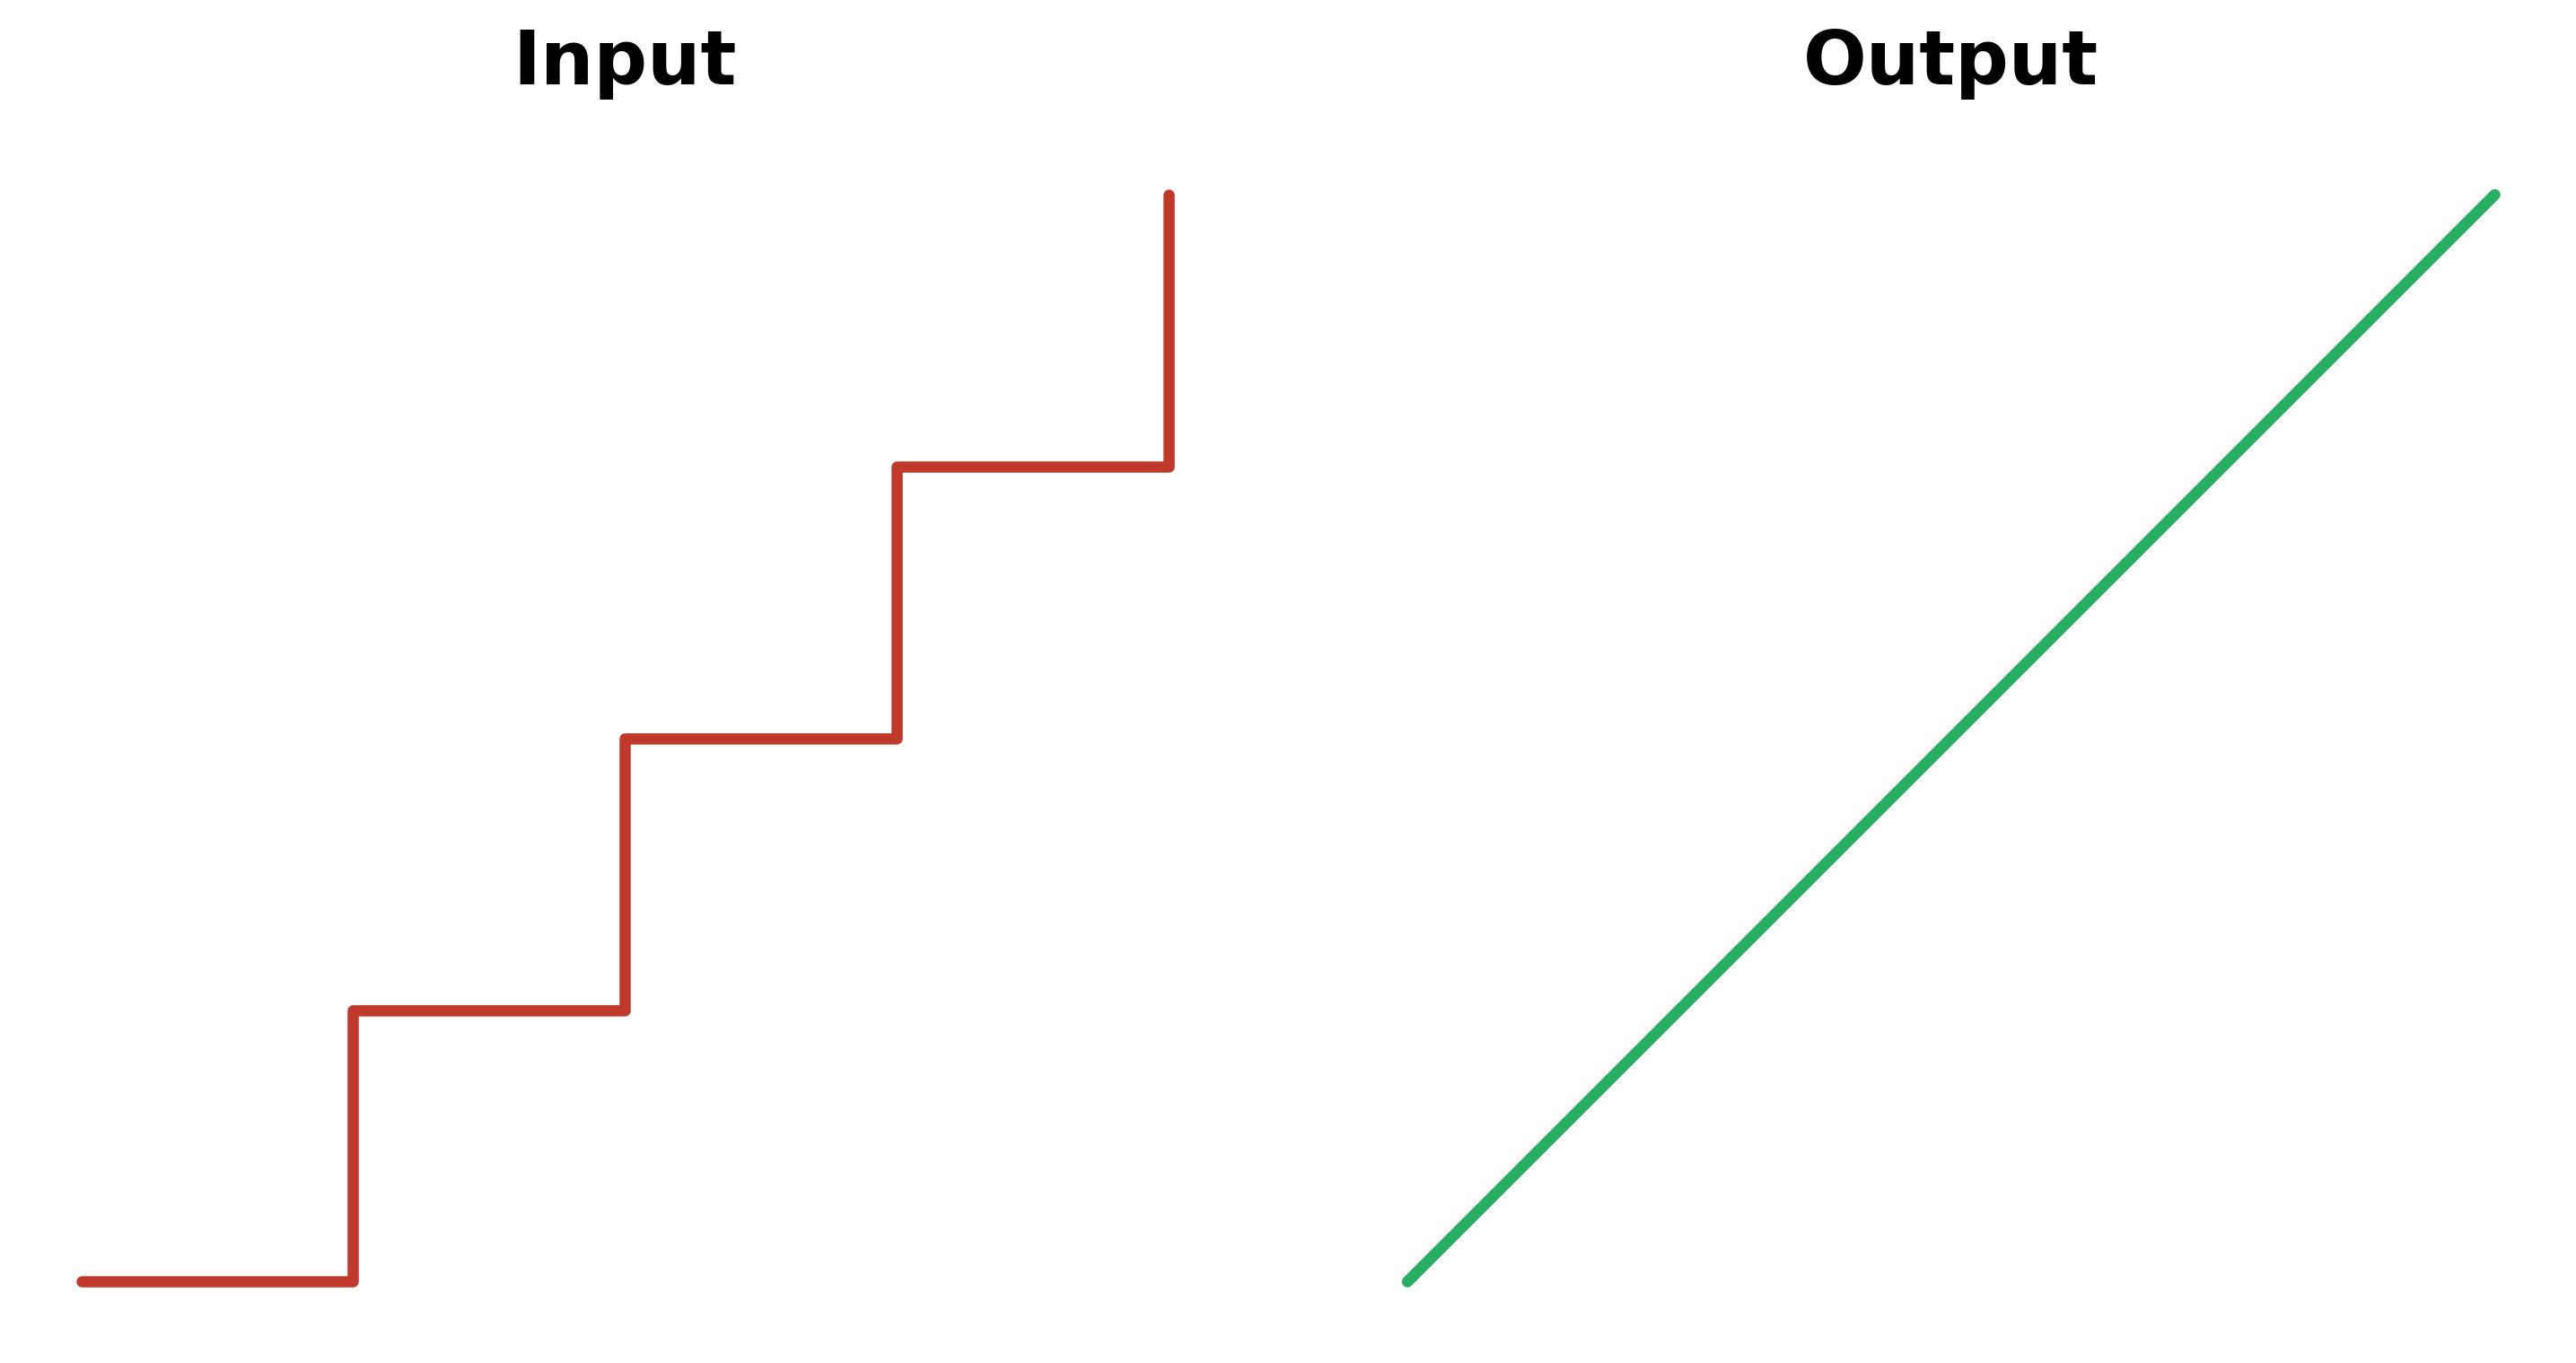


Image saved as 'example_2_linestring.png'


In [16]:
# Create a jagged linestring
jagged_line = LineString(
    [
        (0, 0),
        (10, 0),
        (10, 10),
        (20, 10),
        (20, 20),
        (30, 20),
        (30, 30),
        (40, 30),
        (40, 40),
    ]
)

# Smooth the linestring
smoothed_line = smoothify(geom=jagged_line, segment_length=10.0, smooth_iterations=3)

# Create comparison image
create_comparison_image(
    jagged_line,
    smoothed_line,
    "Example 2: LineString Smoothing",
    "example_2_linestring.png",
    is_line=True,
)

## Example 3: Effect of Different Iteration Counts

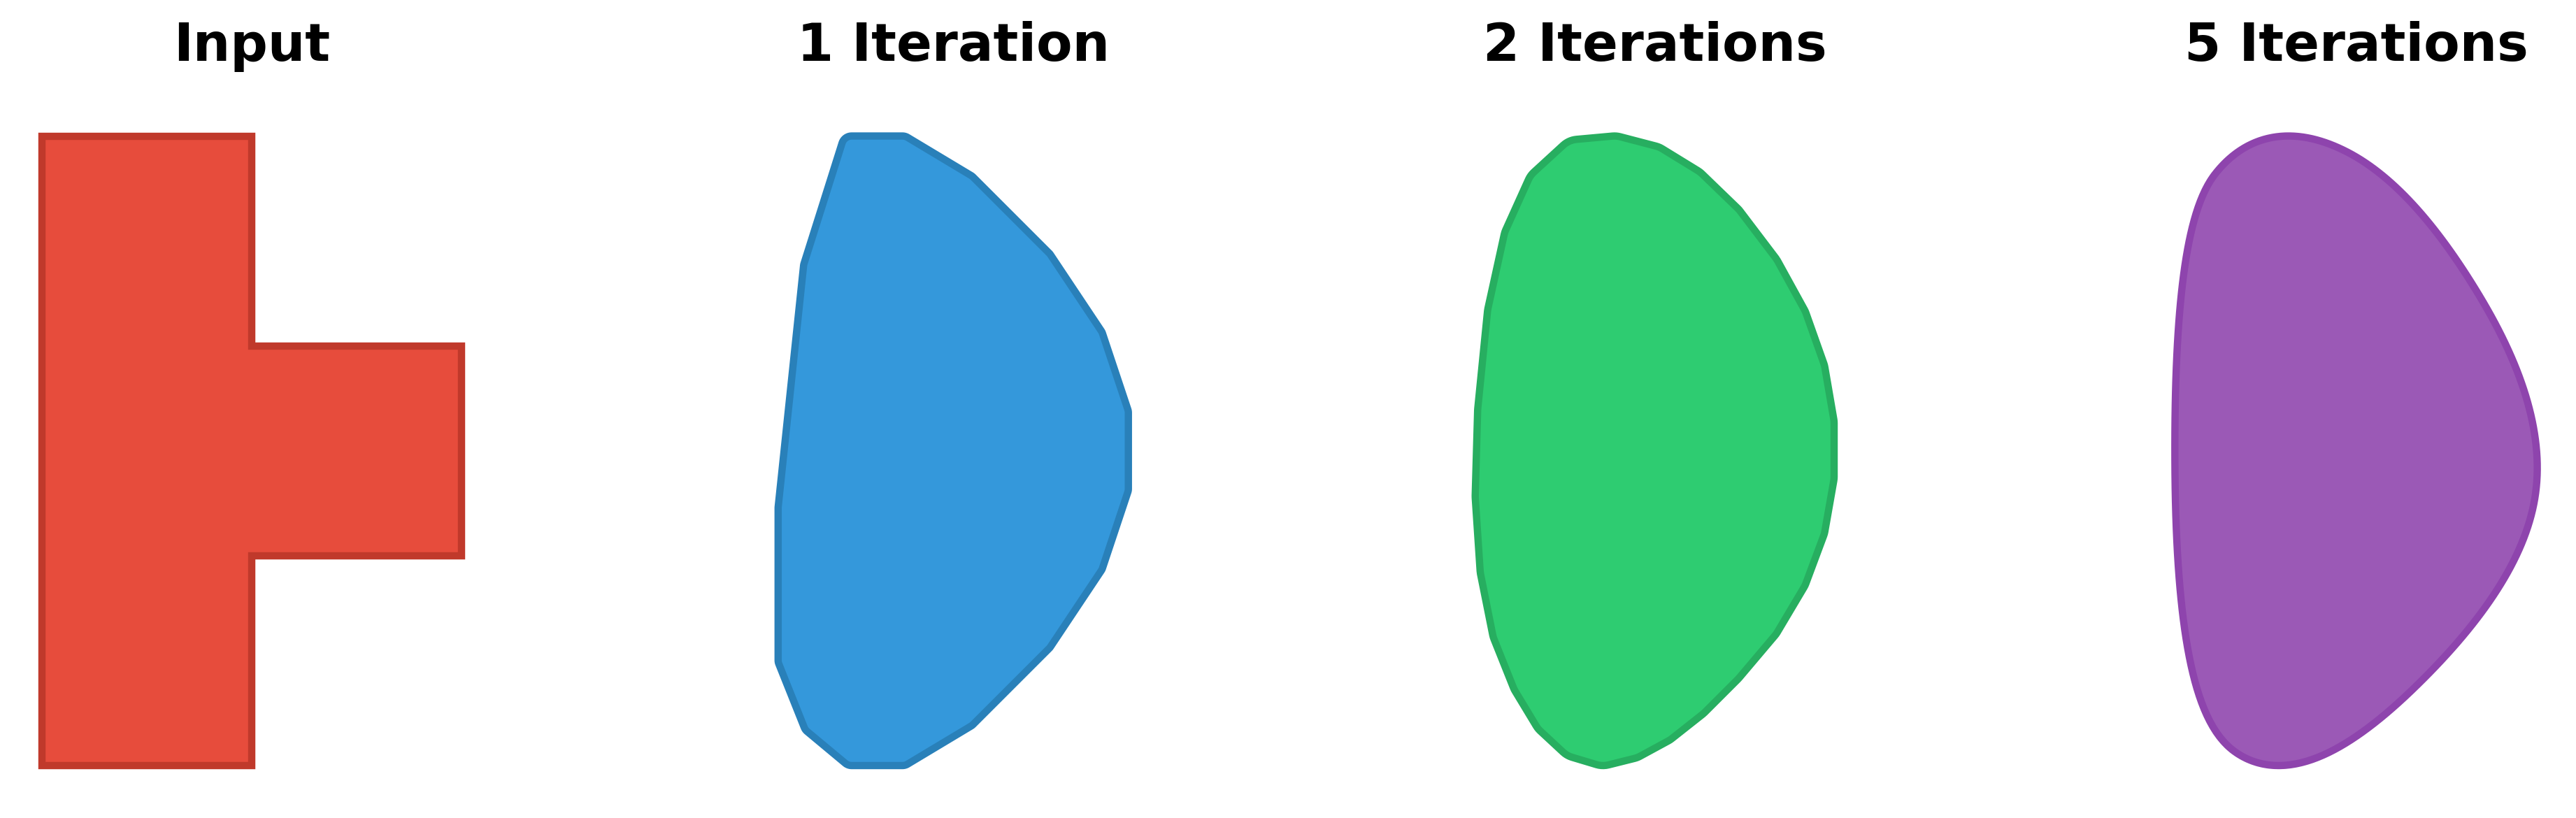


Image saved as 'example_3_iterations.png'


In [19]:
# Create a test polygon
test_polygon = Polygon(
    [(0, 0), (10, 0), (10, 10), (20, 10), (20, 20), (10, 20), (10, 30), (0, 30), (0, 0)]
)

# Apply different iteration counts
iterations = [1, 2, 5]
results = []

for iters in iterations:
    smoothed = smoothify(
        geom=test_polygon, segment_length=10.0, smooth_iterations=iters
    )
    results.append(smoothed)

# Create multi-panel comparison
fig, axes = plt.subplots(1, len(iterations) + 1, figsize=(14, 4))

# Plot original
plot_geometry(test_polygon, axes[0], "#e74c3c", "#c0392b")
axes[0].set_aspect("equal")
axes[0].axis("off")
axes[0].set_title("Input", fontsize=18, fontweight="bold", pad=15)

# Plot each iteration count
colors = ["#3498db", "#2ecc71", "#9b59b6"]  # Blue, green, purple
edge_colors = ["#2980b9", "#27ae60", "#8e44ad"]

for i, (iters, smoothed) in enumerate(zip(iterations, results), 1):
    plot_geometry(smoothed, axes[i], colors[i - 1], edge_colors[i - 1])
    axes[i].set_aspect("equal")
    axes[i].axis("off")
    axes[i].set_title(
        f"{iters} Iteration{'s' if iters > 1 else ''}",
        fontsize=18,
        fontweight="bold",
        pad=15,
    )

plt.tight_layout()
plt.savefig("example_3_iterations.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print(f"\n{'=' * 60}")
print("Image saved as 'example_3_iterations.png'")
print(f"{'=' * 60}")

## Example 4: Merging Adjacent Geometries

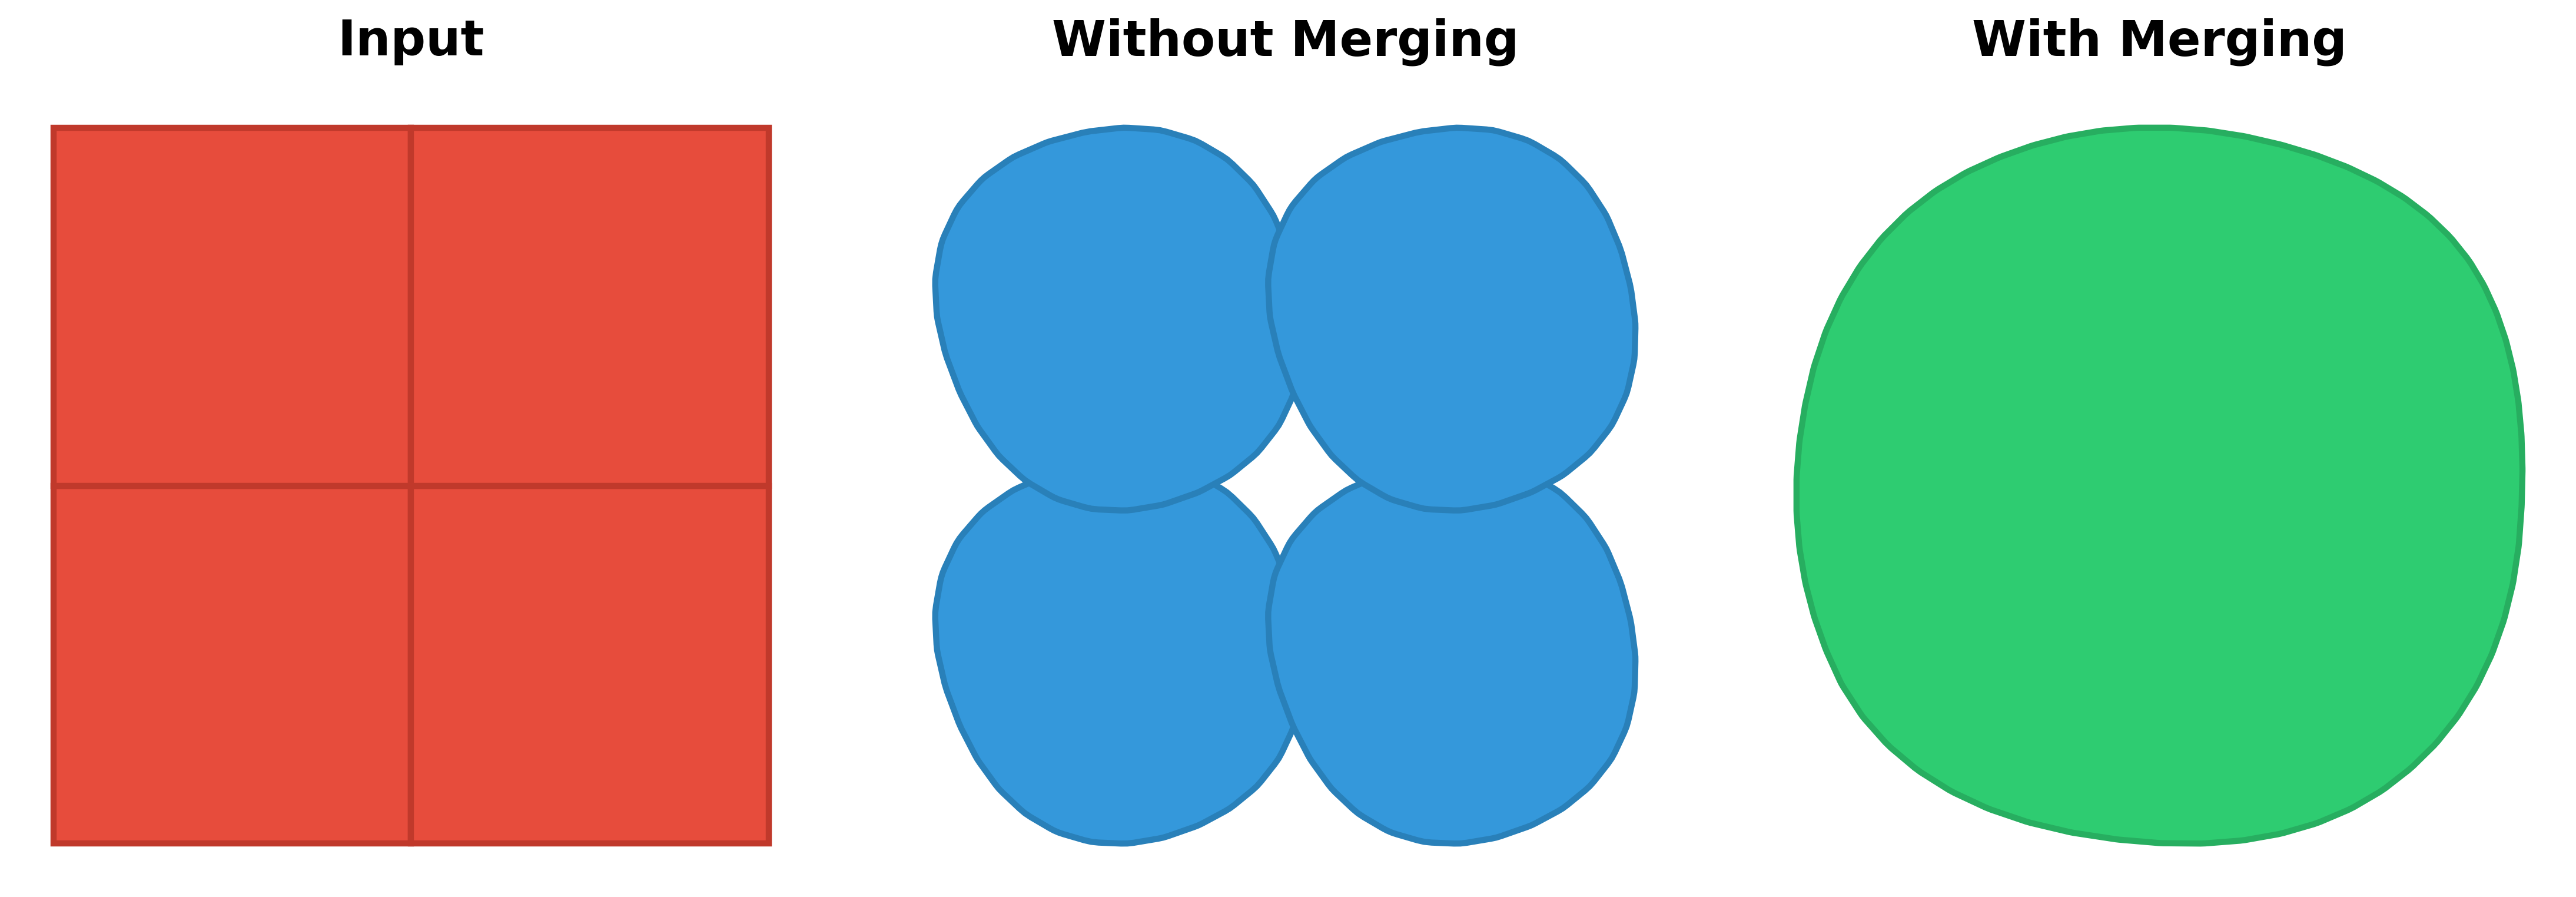


Image saved as 'example_4_merging.png'


In [18]:
# Create adjacent polygons that share edges
adjacent_polygons = [
    Polygon([(0, 0), (10, 0), (10, 10), (0, 10)]),
    Polygon([(10, 0), (20, 0), (20, 10), (10, 10)]),
    Polygon([(0, 10), (10, 10), (10, 20), (0, 20)]),
    Polygon([(10, 10), (20, 10), (20, 20), (10, 20)]),
]

# Smooth without merging
smoothed_no_merge = smoothify(
    geom=adjacent_polygons,
    segment_length=10.0,
    smooth_iterations=3,
    merge_collection=False,
)

# Smooth with merging
smoothed_with_merge = smoothify(
    geom=adjacent_polygons,
    segment_length=10.0,
    smooth_iterations=3,
    merge_collection=True,
)

# Create three-panel comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original
for poly in adjacent_polygons:
    plot_geometry(poly, axes[0], "#e74c3c", "#c0392b")
axes[0].set_aspect("equal")
axes[0].axis("off")
axes[0].set_title("Input", fontsize=20, fontweight="bold", pad=15)

# Plot smoothed without merge
if isinstance(smoothed_no_merge, list):
    for poly in smoothed_no_merge:
        plot_geometry(poly, axes[1], "#3498db", "#2980b9")
else:
    plot_geometry(smoothed_no_merge, axes[1], "#3498db", "#2980b9")
axes[1].set_aspect("equal")
axes[1].axis("off")
axes[1].set_title("Without Merging", fontsize=20, fontweight="bold", pad=15)

# Plot smoothed with merge
if isinstance(smoothed_with_merge, list):
    for poly in smoothed_with_merge:
        plot_geometry(poly, axes[2], "#2ecc71", "#27ae60")
else:
    plot_geometry(smoothed_with_merge, axes[2], "#2ecc71", "#27ae60")
axes[2].set_aspect("equal")
axes[2].axis("off")
axes[2].set_title("With Merging", fontsize=20, fontweight="bold", pad=15)

plt.tight_layout()
plt.savefig("example_4_merging.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print(f"\n{'=' * 60}")
print("Image saved as 'example_4_merging.png'")
print(f"{'=' * 60}")